In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [3]:
# use matplotlib to print image in jupyter notebook
def show(img):
    plt.figure(figsize=(10, 16))
    plt.imshow(img, cmap='gray')
    plt.show()

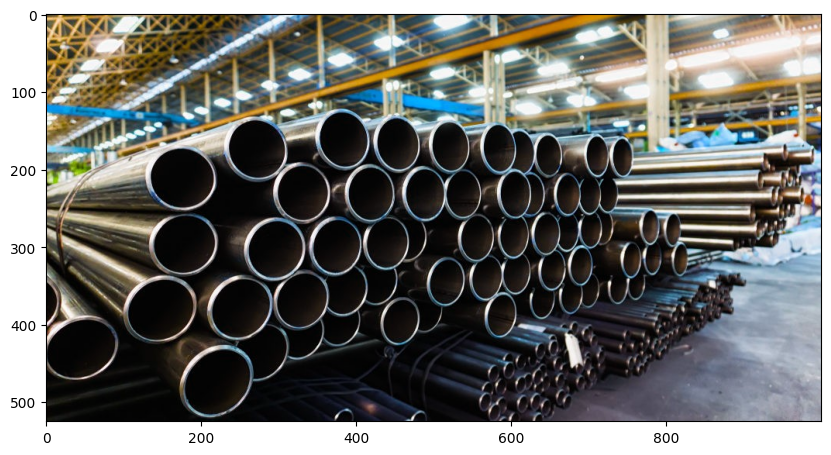

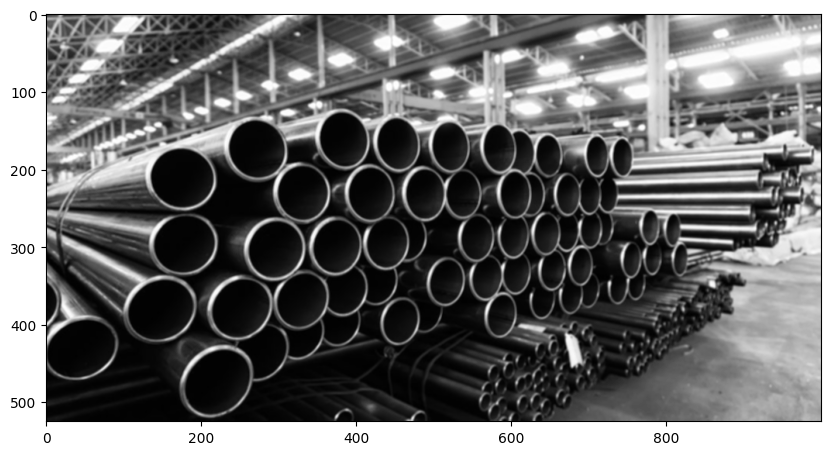

In [5]:
# load the image in full color
img = cv.imread('Pipes_count.jpg', cv.IMREAD_COLOR)
show(img)   

# Convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  
# Apply blur with a 3x3 kernel
gray_blurred = cv.blur(gray, (3, 3))

show(gray_blurred)


In [6]:
# Apply Hough transform on the blurred image.
detected_circles = cv.HoughCircles(gray_blurred, 
                   cv.HOUGH_GRADIENT, 1, 15, param1 = 100,
               param2 = 20, minRadius = 0, maxRadius = 20)

pipes_count = 0


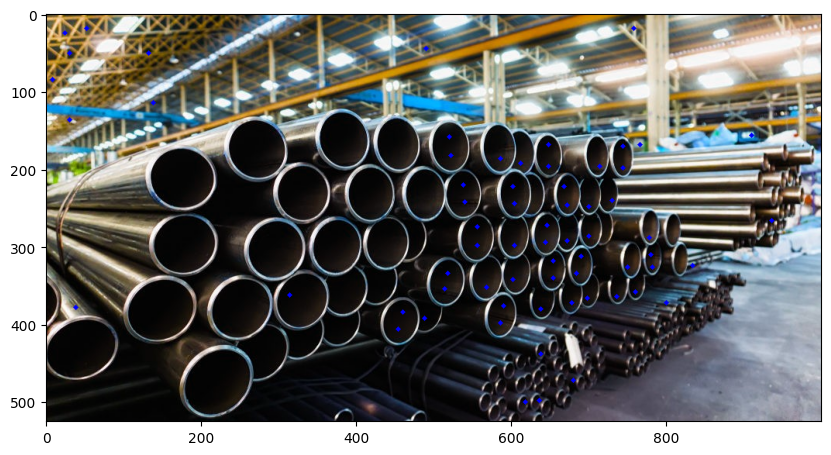

Total number of pipes: 66


In [7]:
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert circle metadata to integers
    detected_circles = np.uint16(np.around(detected_circles))
  
    for points in detected_circles[0, :]:
        a, b, r = points[0], points[1], points[2]
  
        # Draw a small circle (of radius 1) to show the center.
        cv.circle(img, (a, b), 1, (0, 0, 255), 3)
        
        # count the number of pipes
        pipes_count += 1

show(img)
print("Total number of pipes:", pipes_count)